<a href="https://colab.research.google.com/github/JASCRAJ/Sketch-literature/blob/main/160224.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cairosvg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.1/75.1 kB 5.3 MB/s eta 0:00:00


In [ ]:
import xml.etree.ElementTree as ET

def sort_and_save_by_color(svg_path):
    tree = ET.parse(svg_path)
    root = tree.getroot()
    svg_width = root.get('width')
    svg_height = root.get('height')

    # Dictionary to store paths grouped by color
    paths_by_color = {}

    # Iterate through each <path> element
    for path in root.findall(".//path"):
        style = path.get("style")
        color = style.split(";")[0].split(":")[1]

        # Add the path to the corresponding color group
        if color not in paths_by_color:
            paths_by_color[color] = []
        paths_by_color[color].append(path)

    # Create a new SVG file for each color group
    for color, paths in paths_by_color.items():
        new_svg = ET.Element("svg", xmlns="http://www.w3.org/2000/svg", version="1.1", width=svg_width, height=svg_height)
        new_svg.extend(paths)

        # Save the new SVG file with the color in the filename
        output_file_path = f"/content/drive/MyDrive/060224_input/160224/Munch_download_/Munch-J_47093_Munch_master-output_{color}.svg"
        ET.ElementTree(new_svg).write(output_file_path)

        print(f"Saved {len(paths)} paths with color {color} to {output_file_path}")

# Replace '/content/d7597_sketch_2_c_4.svg' with the actual path to your SVG file
sort_and_save_by_color('/content/Munch-J_47093_Munch_master.svg')


Saved 124 paths with color #fcfcfc to /content/drive/MyDrive/060224_input/160224/Munch_download_/Munch-J_47093_Munch_master-output_#fcfcfc.svg
Saved 124 paths with color #5d5d5d to /content/drive/MyDrive/060224_input/160224/Munch_download_/Munch-J_47093_Munch_master-output_#5d5d5d.svg


In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd
import re

def extract_numeric_values(s):
    # Use regular expression to extract numeric values
    return re.findall(r'[-+]?\d*\.\d+|\d+', s)

def parse_svg(svg_file):
    tree = ET.parse(svg_file)
    root = tree.getroot()

    # Extract width and height attributes from the SVG root element
    svg_width = root.get('width')
    svg_height = root.get('height')

    paths = []

    # Iterate through path elements
    for path_elem in root.findall('.//{http://www.w3.org/2000/svg}path'):
        path_data = path_elem.get('d')
        style = path_elem.get('style')

        # Extract numeric values from path_data using the custom function
        numeric_values = extract_numeric_values(path_data)

        # Extract the second and third elements
        M_x = numeric_values[0] if len(numeric_values) > 1 else None
        M_y = numeric_values[1] if len(numeric_values) > 2 else None

        # Calculate the length of the path data
        path_length = len(path_data)

        paths.append({
            'path_data': path_data,
            'style': style,
            'X_value': M_x,
            'Y_value': M_y,
            'path_length': path_length  # Add path length to the dictionary
        })

    # Create DataFrame from paths list
    df = pd.DataFrame(paths)

    # Add width and height to the DataFrame
    df['width'] = svg_width
    df['height'] = svg_height

    # Sort DataFrame based on 'path_length' in descending order
    df.sort_values(by='path_length', ascending=False, inplace=True)

    return df

def save_to_csv(dataframe, csv_filename):
    dataframe.to_csv(csv_filename, index=False)

# Replace '/content/Laura_sketch_1 (12).svg' with the actual path to your SVG file
#svg_file_path = '/content/Munch-unnamed_sketch_1 (1).svg'
svg_file_path = '/content/resized_200_Laura.svg'
# Parse SVG paths and create a DataFrame
df = parse_svg(svg_file_path)
print(len(df))
print(df.head(10))
#range = 700
range=300
# Split DataFrame based on path_length condition
subset_path_length_gt_2000 = df[df['path_length'] > range]
subset_path_length_le_2000 = df[df['path_length'] <= range]

# Replace 'subset_path_length_gt_2000.csv' and 'subset_path_length_le_2000.csv' with desired filenames
save_to_csv(subset_path_length_gt_2000, '/content/drive/MyDrive/060224_input/160224/Munch_download_/resized_200_Laura-subset_path_length_gt_2000.csv')
save_to_csv(subset_path_length_le_2000, '/content/drive/MyDrive/060224_input/160224/Munch_download_/resized_200_Laura-subset_path_length_lt_2000.csv')


24659
                                              path_data  \
1401    M 59,25  L 60,25  L 60,26  L 67,26  L 67,27 ...   
3429    M 183,146  L 184,146  L 184,148  L 183,148  ...   
249     M 79,48  L 75,48  L 75,47  L 76,47  L 76,46 ...   
771     M 175,76  L 176,76  L 176,77  L 175,77  L 17...   
2693    M 24,96  L 24,92  L 25,92  L 25,90  L 24,90 ...   
3524    M 184,24  L 184,31  L 182,31  L 182,32  L 18...   
130     M 32,0  L 32,6  L 31,6  L 31,7  L 32,7  L 32...   
3412    M 180,158  L 181,158  L 181,156  L 180,156  ...   
3282    M 152,18  L 153,18  L 153,17  L 152,17  L 15...   
1717    M 102,131  L 104,131  L 104,128  L 103,128  ...   

                                                  style X_value Y_value  \
1401  fill:rgb(255, 255, 255); fill-opacity:1.000; s...      59      25   
3429  fill:rgb(253, 253, 253); fill-opacity:1.000; s...     183     146   
249   fill:rgb(254, 254, 254); fill-opacity:1.000; s...      79      48   
771   fill:rgb(254, 254, 254); fill-opacity:

In [ ]:
common_path = '/content/drive/MyDrive/060224_input/160224/Munch_download_'
File_name = 'resized_200_Laura'
dist = 250

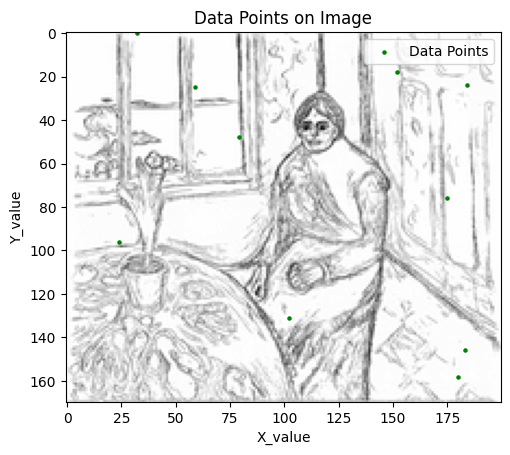

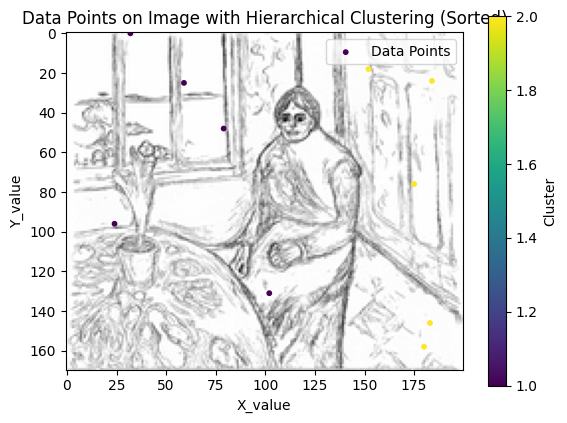

Number of clusters: 2


In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist
import cairosvg


def extract_numeric_values(s):
    # Use regular expression to extract numeric values
    return re.findall(r'[-+]?\d*\.\d+|\d+', s)

# def parse_svg(svg_file):
#     tree = ET.parse(svg_file)
#     root = tree.getroot()

#     paths = []

#     # Iterate through path elements
#     for path_elem in root.findall('.//{http://www.w3.org/2000/svg}path'):
#         path_data = path_elem.get('d')
#         style = path_elem.get('style')

#         # Extract numeric values from path_data using the custom function
#         numeric_values = extract_numeric_values(path_data)

#         # Extract the second and third elements
#         M_x = numeric_values[0] if len(numeric_values) > 1 else None
#         M_y = numeric_values[1] if len(numeric_values) > 2 else None

#         paths.append({
#             'path_data': path_data,
#             'style': style,
#             'X_value': M_x,
#             'Y_value': M_y,
#         })

#     return pd.DataFrame(paths)

# def save_to_csv(dataframe, csv_filename):
#     dataframe.to_csv(csv_filename, index=False)

def plot_data_on_image(csv_file_path, image_file_path):
    df = pd.read_csv(csv_file_path)
    img = mpimg.imread(image_file_path)
    plt.imshow(img, cmap='gray')
    plt.scatter(df['X_value'], df['Y_value'], color='green', marker='o', label='Data Points', s=5)
    plt.title('Data Points on Image')
    plt.xlabel('X_value')
    plt.ylabel('Y_value')
    plt.legend()
    plt.show()

def hierarchical_clustering(csv_file_path, image_file_path, max_distance=dist):
    df = pd.read_csv(csv_file_path)
    distances = pdist(df[['X_value', 'Y_value']])
    linkage_matrix = linkage(distances, method='ward')
    clusters = fcluster(linkage_matrix, t=max_distance, criterion='distance')
    df['Cluster'] = clusters
    df_sorted = df.sort_values(by='Cluster')
    img = mpimg.imread(image_file_path)
    plt.imshow(img, cmap='gray')
    plt.scatter(df_sorted['X_value'], df_sorted['Y_value'], c=df_sorted['Cluster'], cmap='viridis', marker='o', label='Data Points', s=10)
    plt.title('Data Points on Image with Hierarchical Clustering (Sorted)')
    plt.xlabel('X_value')
    plt.ylabel('Y_value')
    plt.colorbar(label='Cluster')
    plt.legend()
    plt.show()
    num_clusters = len(set(clusters))
    print("Number of clusters:", num_clusters)
    return df_sorted

def save_sorted_csv(df_sorted, output_csv_path):
    df_sorted.to_csv(output_csv_path, index=False)
def get_svg_width_height(svg_file):
    tree = ET.parse(svg_file)
    root = tree.getroot()
    width = root.attrib.get('width')
    height = root.attrib.get('height')
    return width, height


def save_svg_and_png_files(df_sorted, output_dir_svg, output_dir_png, svg_file_path):
    os.makedirs(output_dir_svg, exist_ok=True)
    os.makedirs(output_dir_png, exist_ok=True)
    width, height = get_svg_width_height(svg_file_path)
    cumulative_svg_content = f'<svg xmlns="http://www.w3.org/2000/svg" width="{width}" height="{height}">'
    grouped_clusters = df_sorted.groupby('Cluster')

    for cluster, group in grouped_clusters:
        paths_data = group['path_data'].tolist()
        styles = group['style'].tolist()

        svg_content = ''

        for path_data, style in zip(paths_data, styles):
            #svg_content += f'<path d="{path_data}" style="fill: none; stroke: black;stroke-width: 2px;" />\n'
            svg_content += f'<path d="{path_data}" style="{style}" />\n'
            #svg_content += f'<path d="{path_data}" style="fill: none; stroke: black;stroke-width: 2px;" />\n'

        cumulative_svg_content += svg_content
        f_content_gt = cumulative_svg_content + '</svg>'

        svg_file_path = os.path.join(output_dir_svg, f'accumulated_clusters_1_{cluster}.svg')
        with open(svg_file_path, 'w') as f:
            f.write(f_content_gt)

        png_file_path = os.path.join(output_dir_png, f'accumulated_clusters_1_{cluster}.png')
        cairosvg.svg2png(url=svg_file_path, write_to=png_file_path)
    return cumulative_svg_content
    #print(cumulative_svg_content)

# Example usage:
# Define common path
# common_path = '/content/drive/MyDrive/060224_input/160224/Munch_download_'
# File_name = 'Munch-unnamed_sketch_1'

# svg_file_path = os.path.join(common_path, File_name + '.svg')
csv_file_path = os.path.join(common_path, File_name + '-subset_path_length_gt_2000.csv')
image_file_path = os.path.join(common_path, File_name + '.png')
output_csv_path = os.path.join(common_path, File_name +'output_sorted.csv')
svg_output_dir = os.path.join(common_path, File_name + 'svg_files')
png_output_dir = os.path.join(common_path, File_name +'png_files')

# Parse SVG paths and create a DataFrame
#df = parse_svg(svg_file_path)
#save_to_csv(df, csv_file_path)

# Plot data points on image
plot_data_on_image(csv_file_path, image_file_path)

# Perform hierarchical clustering and visualize
df_sorted = hierarchical_clustering(csv_file_path, image_file_path)
# Save sorted DataFrame to CSV
save_sorted_csv(df_sorted, output_csv_path)

# Save SVG and PNG files
# Call the function with the corrected argument
p_data = save_svg_and_png_files(df_sorted, svg_output_dir, png_output_dir, svg_file_path)
#print(p_data)
#save_svg_and_png_files(df_sorted, svg_output_dir)


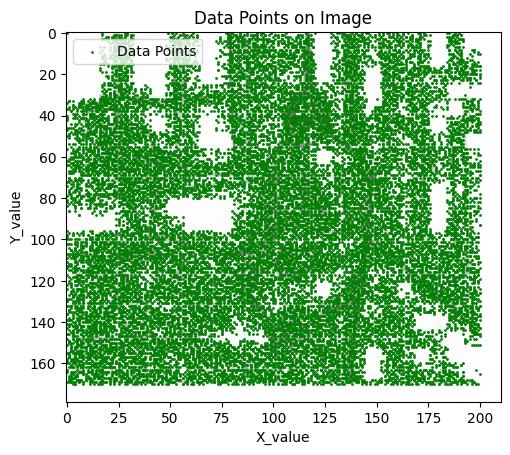

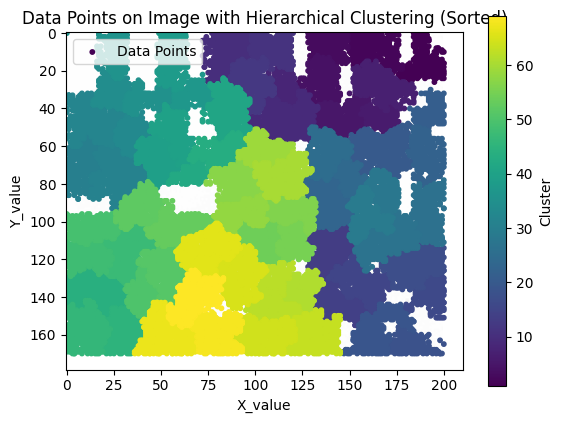

Number of clusters: 69
                                               path_data  \
0        M 184,6  L 185,6  L 185,5  L 184,5  L 184,0 ...   
16607        M 185,20  L 184,20  L 184,21  L 185,21  Z     
16612        M 184,23  L 185,23  L 185,22  L 184,22  Z     
16648        M 186,13  L 186,12  L 185,12  L 185,13  Z     
16671        M 195,17  L 194,17  L 194,18  L 195,18  Z     
...                                                  ...   
9441         M 61,149  L 61,148  L 60,148  L 60,149  Z     
14258        M 59,144  L 58,144  L 58,145  L 59,145  Z     
14260        M 61,155  L 61,156  L 62,156  L 62,155  Z     
7829         M 67,146  L 67,147  L 68,147  L 68,146  Z     
9545         M 58,146  L 58,145  L 57,145  L 57,146  Z     

                                                   style  X_value  Y_value  \
0      fill:rgb(254, 254, 254); fill-opacity:1.000; s...      184        6   
16607  fill:rgb(250, 250, 250); fill-opacity:1.000; s...      185       20   
16612  fill:rgb(250, 2

KeyboardInterrupt: 

In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist
import cairosvg



def extract_numeric_values(s):
    # Use regular expression to extract numeric values
    return re.findall(r'[-+]?\d*\.\d+|\d+', s)

# def parse_svg(svg_file):
#     tree = ET.parse(svg_file)
#     root = tree.getroot()

#     paths = []

#     # Iterate through path elements
#     for path_elem in root.findall('.//{http://www.w3.org/2000/svg}path'):
#         path_data = path_elem.get('d')
#         style = path_elem.get('style')

#         # Extract numeric values from path_data using the custom function
#         numeric_values = extract_numeric_values(path_data)

#         # Extract the second and third elements
#         M_x = numeric_values[0] if len(numeric_values) > 1 else None
#         M_y = numeric_values[1] if len(numeric_values) > 2 else None

#         paths.append({
#             'path_data': path_data,
#             'style': style,
#             'X_value': M_x,
#             'Y_value': M_y,
#         })

#     return pd.DataFrame(paths)

# def save_to_csv(dataframe, csv_filename):
#     dataframe.to_csv(csv_filename, index=False)

def plot_data_on_image(csv_file_path, image_file_path):
    df = pd.read_csv(csv_file_path)
    img = mpimg.imread(image_file_path)
    plt.imshow(img, cmap='gray')
    plt.scatter(df['X_value'], df['Y_value'], color='green', marker='o', label='Data Points', s=1)
    plt.title('Data Points on Image')
    plt.xlabel('X_value')
    plt.ylabel('Y_value')
    plt.legend()
    plt.show()

# def hierarchical_clustering(csv_file_path, image_file_path, max_distance=dist):
#     df = pd.read_csv(csv_file_path)
#     distances = pdist(df[['X_value', 'Y_value']])
#     linkage_matrix = linkage(distances, method='ward')
#     clusters = fcluster(linkage_matrix, t=max_distance, criterion='distance')
#     df['Cluster'] = clusters
#     df_sorted = df.sort_values(by='Cluster')
#     img = mpimg.imread(image_file_path)
#     plt.imshow(img, cmap='gray')
#     plt.scatter(df_sorted['X_value'], df_sorted['Y_value'], c=df_sorted['Cluster'], cmap='viridis', marker='o', label='Data Points', s=10)
#     plt.title('Data Points on Image with Hierarchical Clustering (Sorted)')
#     plt.xlabel('X_value')
#     plt.ylabel('Y_value')
#     plt.colorbar(label='Cluster')
#     plt.legend()
#     plt.show()
#     num_clusters = len(set(clusters))
#     print("Number of clusters:", num_clusters)
#     return df_sorted

import numpy as np

def hierarchical_clustering_center_first(csv_file_path, image_file_path, max_distance=dist):
    # Read data from CSV
    df = pd.read_csv(csv_file_path)

    # Calculate center point
    center_x = df['X_value'].mean()
    center_y = df['Y_value'].mean()

    # Calculate distances from center
    df['Distance'] = np.sqrt((df['X_value'] - center_x)**2 + (df['Y_value'] - center_y)**2)

    # Sort data by distance from center
    df_sorted = df.sort_values(by='Distance')

    # Perform hierarchical clustering
    distances = pdist(df_sorted[['X_value', 'Y_value']])
    linkage_matrix = linkage(distances, method='ward')
    clusters = fcluster(linkage_matrix, t=max_distance, criterion='distance')

    # Assign clusters to DataFrame
    df_sorted['Cluster'] = clusters

    # Visualize clustered data
    img = mpimg.imread(image_file_path)
    plt.imshow(img, cmap='gray')
    plt.scatter(clusters['X_value'], clusters['Y_value'], c=clusters['Cluster'], cmap='viridis', marker='o', label='Data Points', s=10)
    plt.title('Data Points on Image with Hierarchical Clustering (Center First)')
    plt.xlabel('X_value')
    plt.ylabel('Y_value')
    plt.colorbar(label='Cluster')
    plt.legend()
    plt.show()

    # Print number of clusters
    num_clusters = len(set(clusters))
    print("Number of clusters:", num_clusters)

    return df_sorted


def save_sorted_csv(df_sorted, output_csv_path):
    df_sorted.to_csv(output_csv_path, index=False)
def get_svg_width_height(svg_file):
    tree = ET.parse(svg_file)
    root = tree.getroot()
    width = root.attrib.get('width')
    height = root.attrib.get('height')
    return width, height



def save_svg_and_png_files(df_sorted, output_dir_svg, output_dir_png, svg_file_path):
    os.makedirs(output_dir_svg, exist_ok=True)
    os.makedirs(output_dir_png, exist_ok=True)
    width, height = get_svg_width_height(svg_file_path)
    #cumulative_svg_content = f'<svg xmlns="http://www.w3.org/2000/svg" width="{width}" height="{height}">'
    cumulative_svg_content = p_data
    grouped_clusters = df_sorted.groupby('Cluster')

    for cluster, group in grouped_clusters:
        paths_data = group['path_data'].tolist()
        styles = group['style'].tolist()

        svg_content = ''

        for path_data, style in zip(paths_data, styles):
            svg_content += f'<path d="{path_data}" style="{style}" />\n'
            #svg_content += f'<path d="{path_data}" style="fill: none; stroke: black;stroke-width: 2px;" />\n'

        cumulative_svg_content += svg_content
        f_content = cumulative_svg_content + '</svg>'

        svg_file_path = os.path.join(output_dir_svg, f'accumulated_clusters_2_{cluster}.svg')
        with open(svg_file_path, 'w') as f:
            f.write(f_content)

        png_file_path = os.path.join(output_dir_png, f'accumulated_clusters_2_{cluster}.png')
        cairosvg.svg2png(url=svg_file_path, write_to=png_file_path)




# Example usage:
# Define common path


# svg_file_path = os.path.join(common_path, File_name + '.svg')
csv_file_path = os.path.join(common_path, File_name + '-subset_path_length_lt_2000.csv')
image_file_path = os.path.join(common_path, File_name + '.png')
output_csv_path = os.path.join(common_path, File_name +'output_sorted_lt.csv')
svg_output_dir = os.path.join(common_path, File_name + 'svg_files_lt')
png_output_dir = os.path.join(common_path, File_name +'png_files')

# Parse SVG paths and create a DataFrame
#df = parse_svg(svg_file_path)
#save_to_csv(df, csv_file_path)

# Plot data points on image
plot_data_on_image(csv_file_path, image_file_path)

# Perform hierarchical clustering and visualize
df_sorted = hierarchical_clustering(csv_file_path, image_file_path)
print(df_sorted)
# Save sorted DataFrame to CSV
save_sorted_csv(df_sorted, output_csv_path)

# Save SVG and PNG files
# Call the function with the corrected argument
save_svg_and_png_files(df_sorted, svg_output_dir, png_output_dir, svg_file_path)
#save_svg_and_png_files(df_sorted, svg_output_dir)


In [ ]:
import os
import re
from PIL import Image

def generate_gif(input_folder, output_gif, duration):
    # Get list of image files in the input folder
    images = [img for img in os.listdir(input_folder) if img.endswith(".png") or img.endswith(".jpg")]

    # Sort images based on filename (assuming filenames are numbered)
    images.sort(key=lambda x: int(re.search(r'\d+', x).group()))

    # Open each image and append it to frames list
    frames = []
    for image_name in images:
        image_path = os.path.join(input_folder, image_name)
        frames.append(Image.open(image_path))

    # Save frames as GIF with specified duration between frames
    frames[0].save(output_gif, format='GIF', append_images=frames[1:], save_all=True, duration=duration, loop=0)

    print("GIF generated successfully.")

# Example usage
input_folder = png_output_dir#"/content/drive/MyDrive/060224_input/160224/Munch_download_/Munch-J_47093_Munch_masterpng_files"
output_gif = "/content/resized_200_Laura.gif"
duration = 300  # in milliseconds (3 seconds)
generate_gif(input_folder, output_gif, duration)


GIF generated successfully.


In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image

# Load pre-trained ResNet-50 model
resnet = models.resnet50(pretrained=True)
resnet.eval()

# Define image transformations
preprocess = transforms.Compose([
    transforms.ToTensor(),
])

# Load and preprocess images
image1 = Image.open("/content/drive/MyDrive/060224_input/160224/Munch_download_/Munch-J_47093_Munch_masterpng_files/accumulated_clusters_1_2.png").convert('RGB')
#image1 = Image.open("/content/drive/MyDrive/060224_input/160224/Munch_download_/Munch-images_sketch_1png_files/accumulated_clusters_1_1.png").convert('RGB')
image2 = Image.open("/content/drive/MyDrive/060224_input/160224/Munch_download_/Munch-J_47093_Munch_master.png").convert('RGB')
image1_tensor = preprocess(image1).unsqueeze(0)
image2_tensor = preprocess(image2).unsqueeze(0)

# Extract features
with torch.no_grad():
    features1 = resnet(image1_tensor)
    features2 = resnet(image2_tensor)

# Calculate cosine similarity
cos = torch.nn.CosineSimilarity(dim=1, eps=1e-6)
similarity = cos(features1, features2)
print("Cosine Similarity:", similarity.item())


Cosine Similarity: 0.9360272884368896
